<a href="https://colab.research.google.com/github/pramod1997/submission_data_sciece/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix , roc_curve , auc

In [0]:
df = pd.read_csv('new_processed_data.csv')

In [0]:
### drop columns with target value --> 2 
df.drop(df[df['pymt_standing']==2].index , inplace = True)

In [0]:
feature = [x for x in df.columns if x not in ['pymt_standing']]
Y = df['pymt_standing']
X = df[feature]

In [0]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



clf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced') , param_grid ,cv =5 )


In [7]:
clf.fit(X_train,Y_train) ## fitting it

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [8]:
clf.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 31}

In [0]:
model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=31, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [16]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=31, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [17]:
confusion_matrix(Y_test , model.predict(X_test))

array([[ 70,   0],
       [  0, 294]])

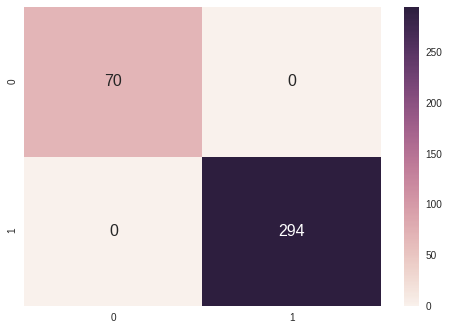

In [18]:
##plotting confusion matrix 
prediction = model.predict(X_test)
array = confusion_matrix(Y_test,prediction)
df_cm = pd.DataFrame(array, [0,1],
                  [0,1])
#plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual Label')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16} ,fmt='g')# font size

In [19]:
roc_score = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
roc_score

1.0

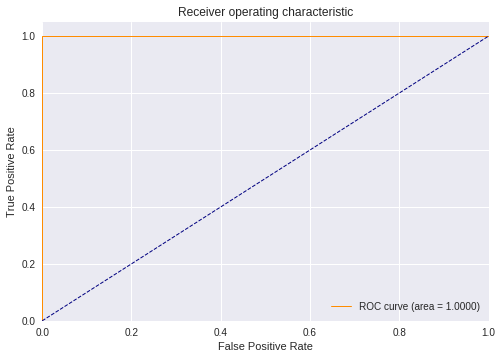

In [20]:
## plot roc curve
###  

target = Y_test
prediction = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve( target,prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()